<a href="https://colab.research.google.com/github/Adnan2163/DAUP/blob/main/2203A52163_DAUP_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest

In [4]:
df = pd.read_csv("/content/dermatology_database_1.csv")

In [5]:
df = pd.read_csv("dermatology_database_1.csv")

df['age'] = pd.to_numeric(df['age'], errors='coerce')

df = df.dropna()

X = df.drop(columns=['class'])
y = df['class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, svm_predictions))

SVM Results:
              precision    recall  f1-score   support

           1       0.81      1.00      0.90        22
           2       0.48      1.00      0.65        14
           3       1.00      0.93      0.96        14
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        12
           6       0.67      1.00      0.80         2

    accuracy                           0.71        72
   macro avg       0.49      0.65      0.55        72
weighted avg       0.56      0.71      0.61        72



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, rf_predictions))

Random Forest Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        14
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



In [9]:
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X)
outlier_labels = iso.predict(X)

In [10]:
mask = outlier_labels == 1
X_clean = X[mask]
y_clean = y[mask]

In [11]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [12]:
svm_model_clean = SVC()
svm_model_clean.fit(X_train_clean, y_train_clean)
svm_predictions_clean = svm_model_clean.predict(X_test_clean)
print("SVM Results after Outlier Removal:")
print(classification_report(y_test_clean, svm_predictions_clean))

SVM Results after Outlier Removal:
              precision    recall  f1-score   support

           1       0.58      1.00      0.73        15
           2       0.80      0.50      0.62        16
           3       1.00      1.00      1.00        11
           4       0.20      0.50      0.29         6
           5       0.00      0.00      0.00        15
           6       0.83      1.00      0.91         5

    accuracy                           0.62        68
   macro avg       0.57      0.67      0.59        68
weighted avg       0.56      0.62      0.56        68



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
rf_model_clean = RandomForestClassifier(random_state=42)
rf_model_clean.fit(X_train_clean, y_train_clean)
rf_predictions_clean = rf_model_clean.predict(X_test_clean)
print("Random Forest Results after Outlier Removal:")
print(classification_report(y_test_clean, rf_predictions_clean))

Random Forest Results after Outlier Removal:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        11
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         5

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



<ipython-input-14-f1ef7d915106>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


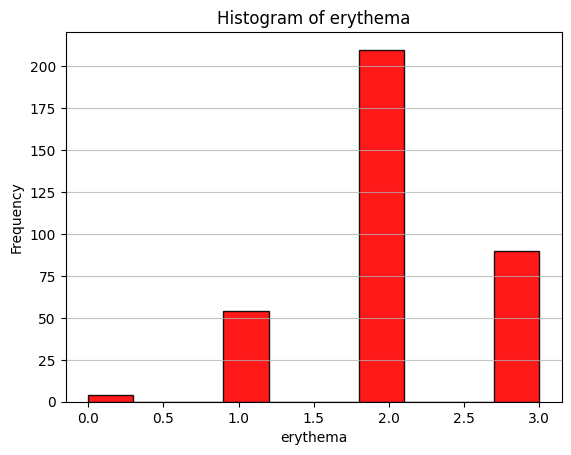

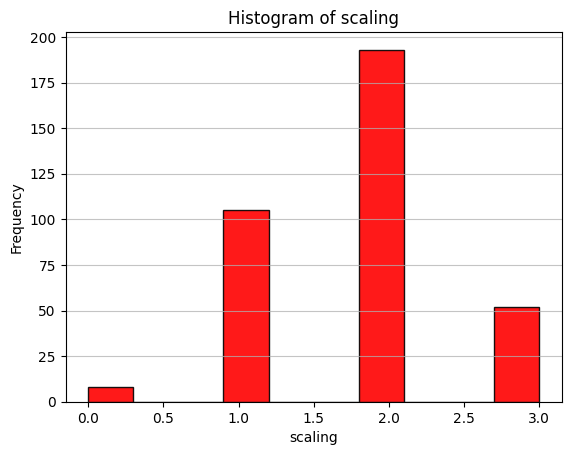

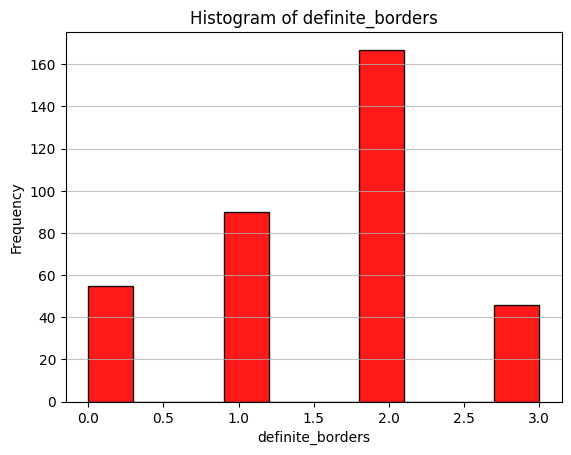

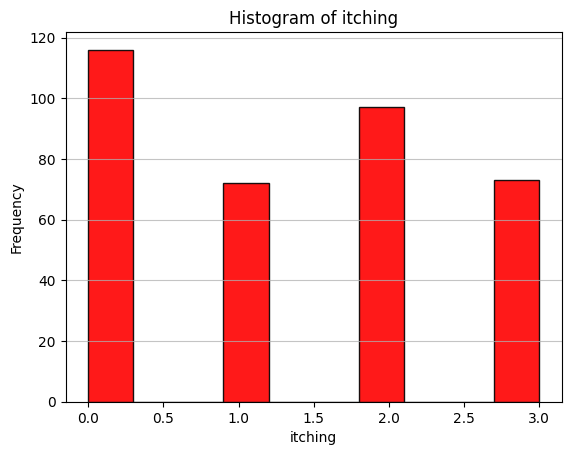

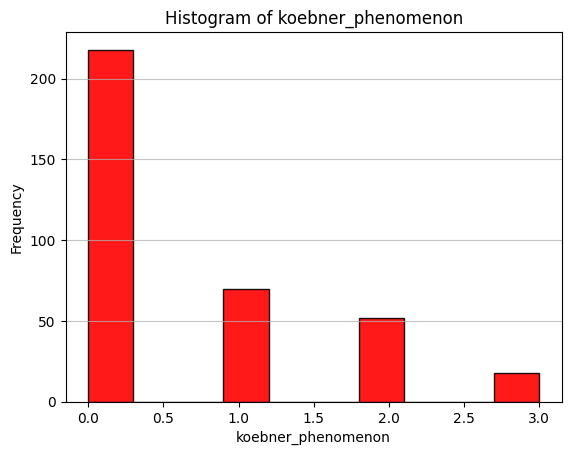

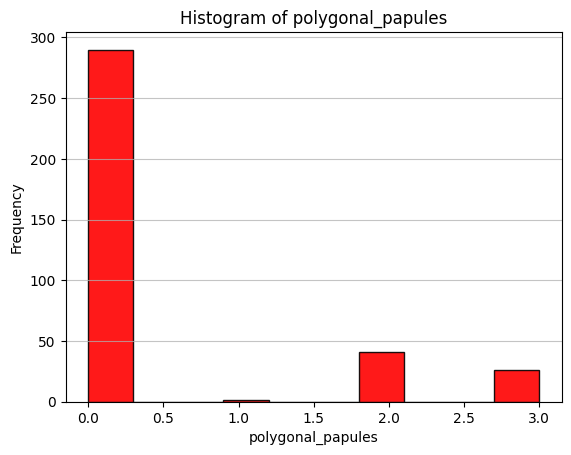

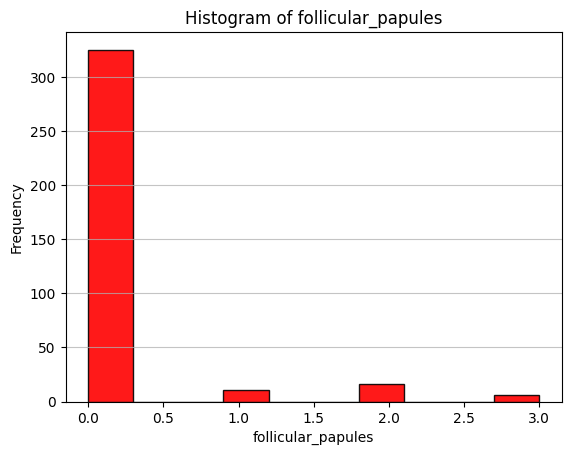

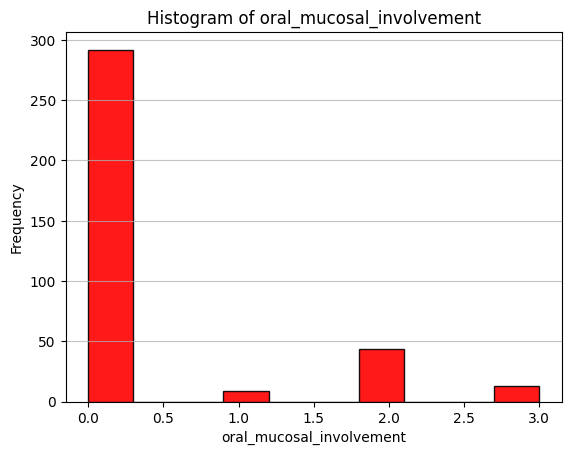

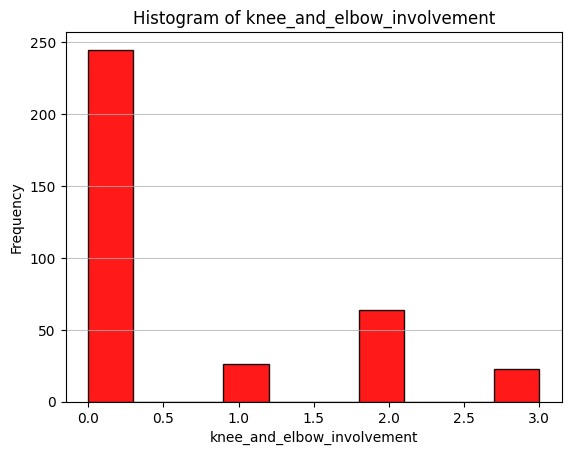

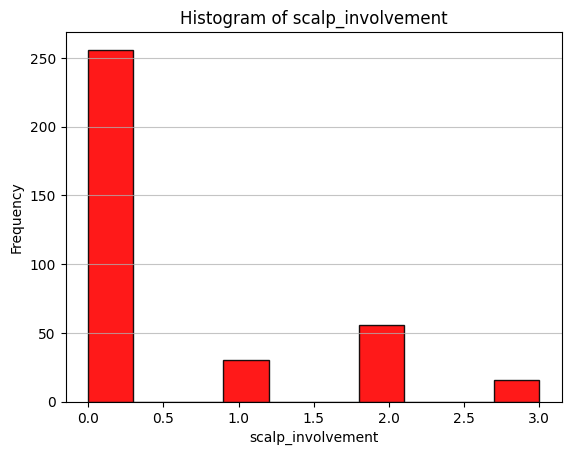

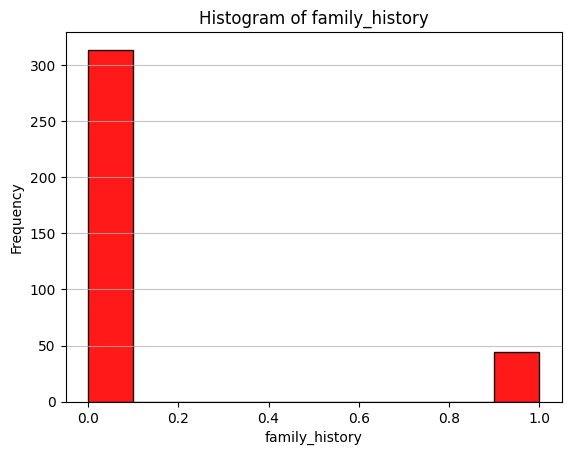

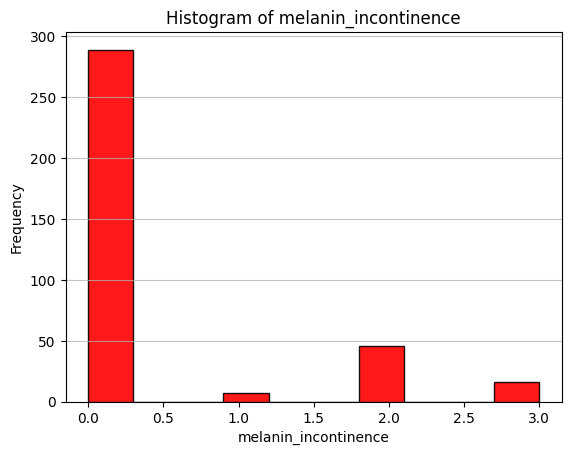

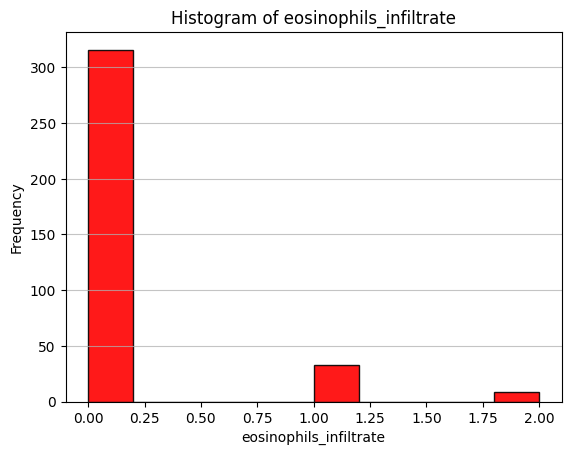

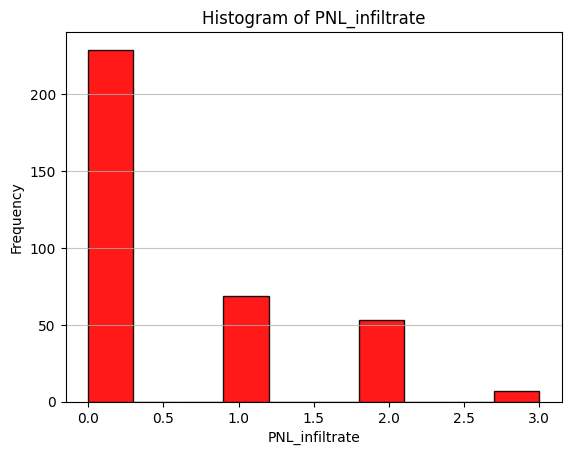

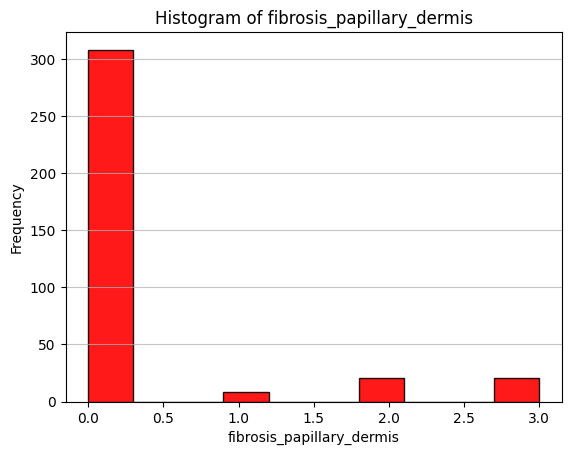

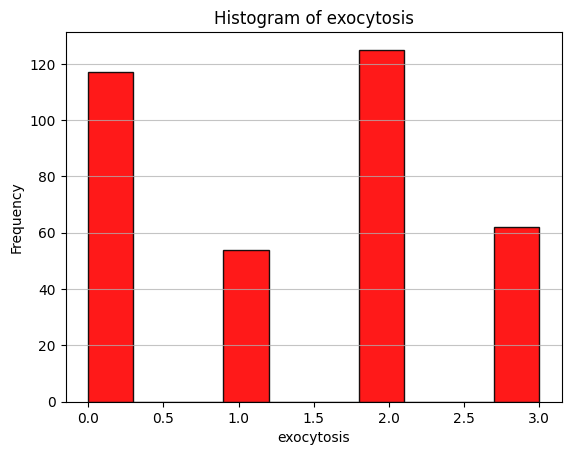

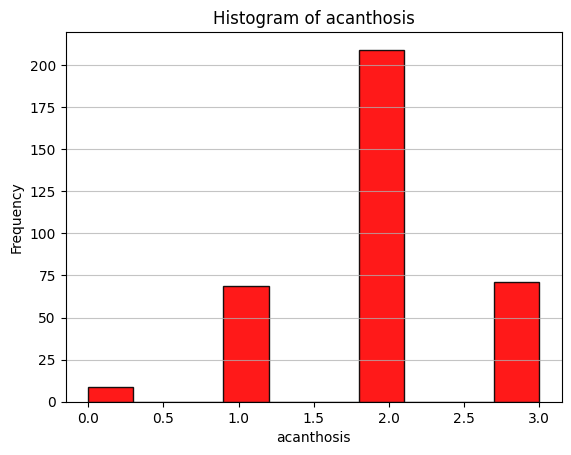

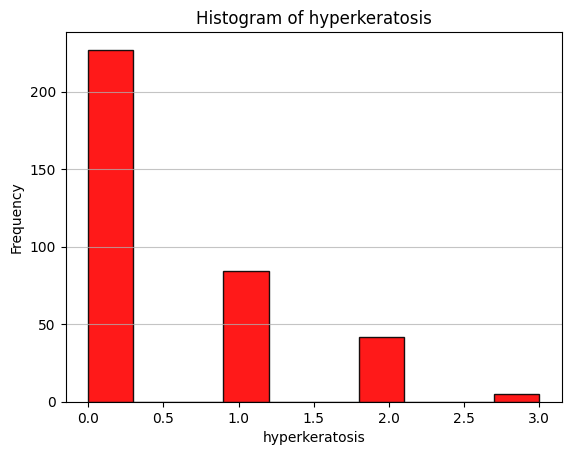

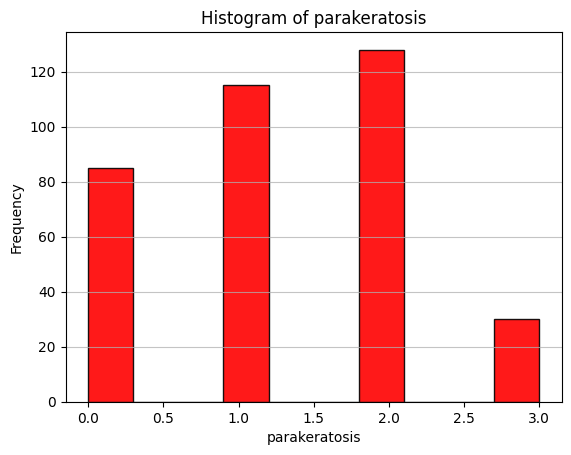

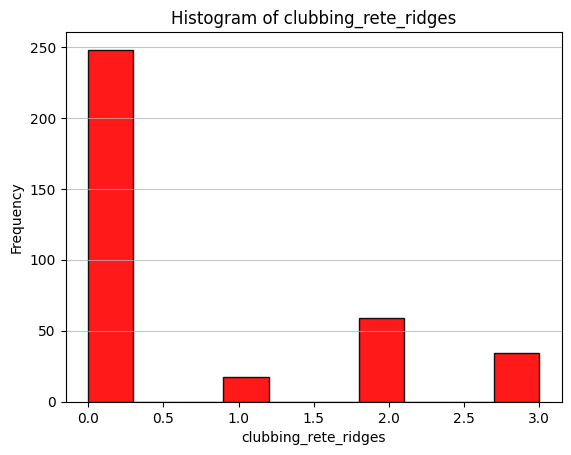

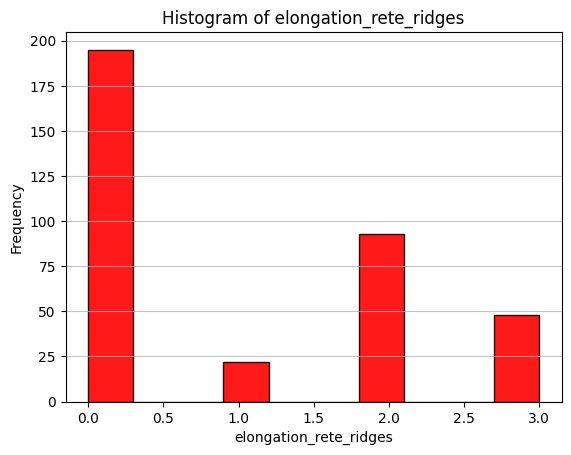

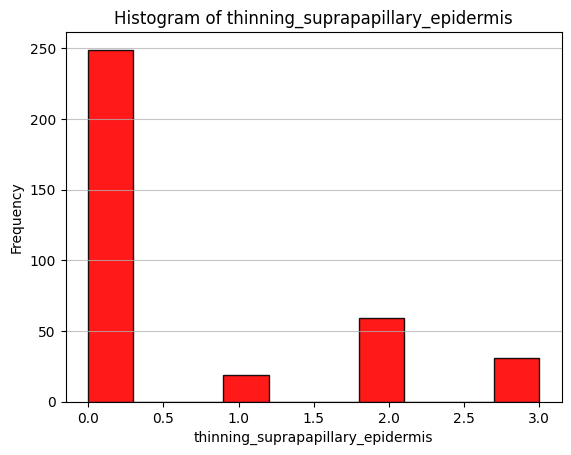

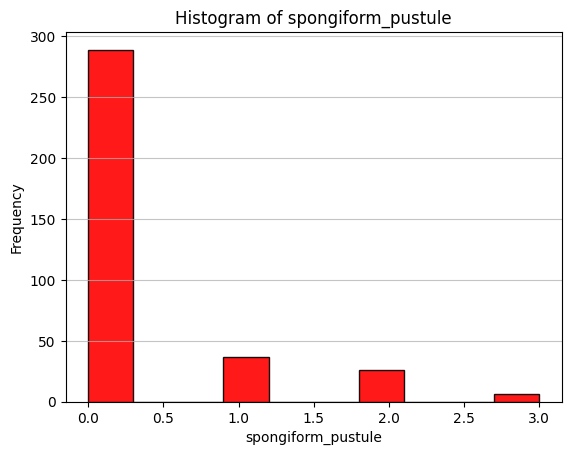

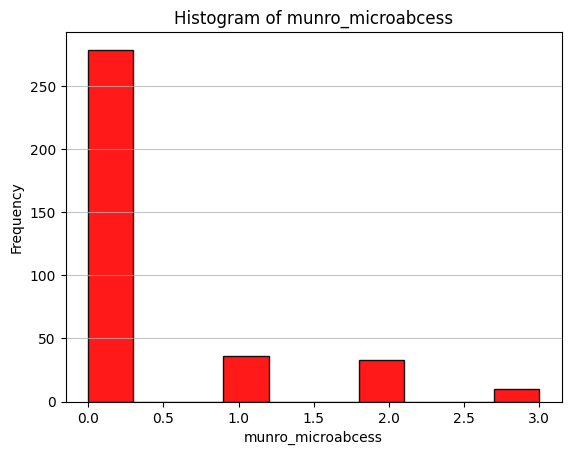

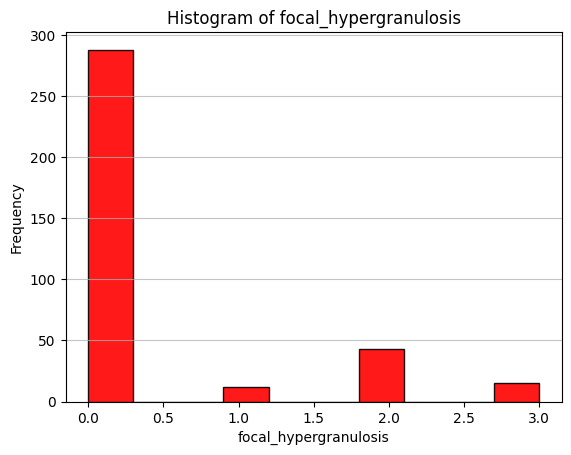

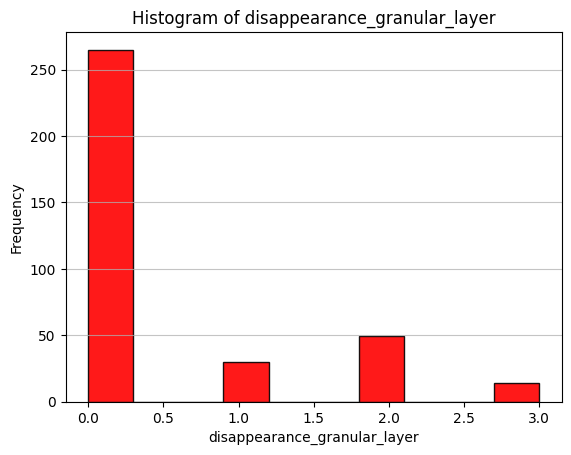

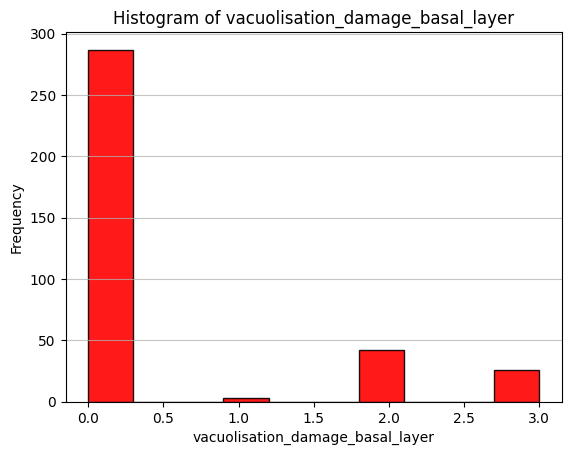

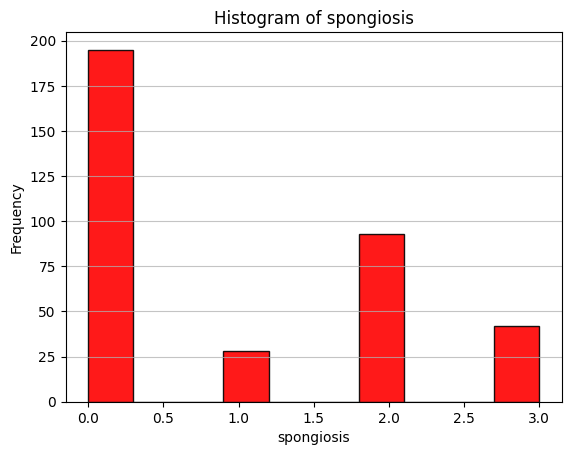

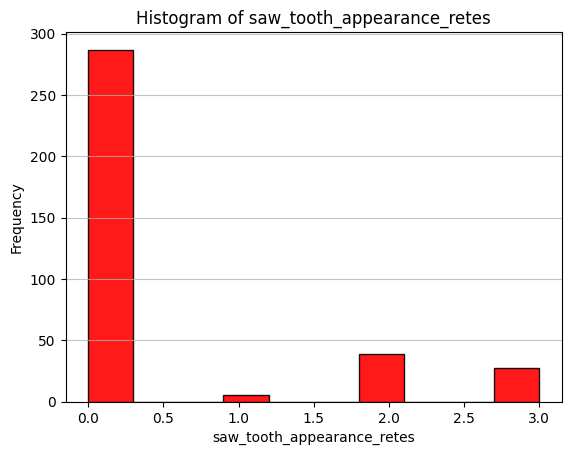

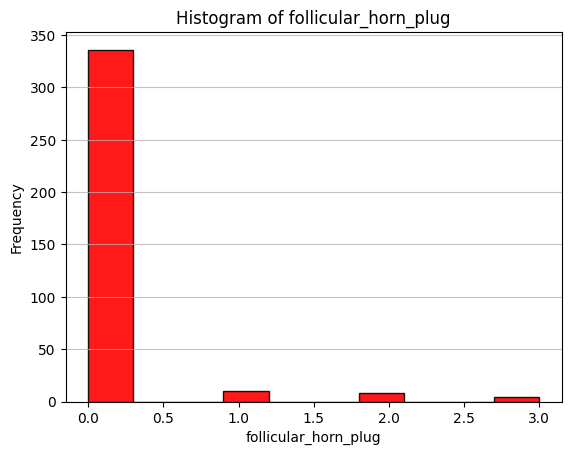

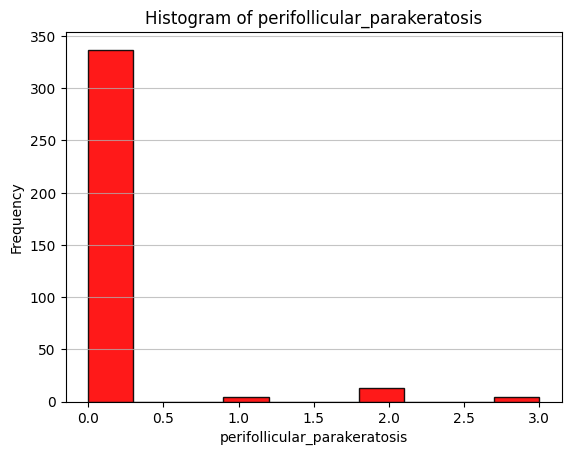

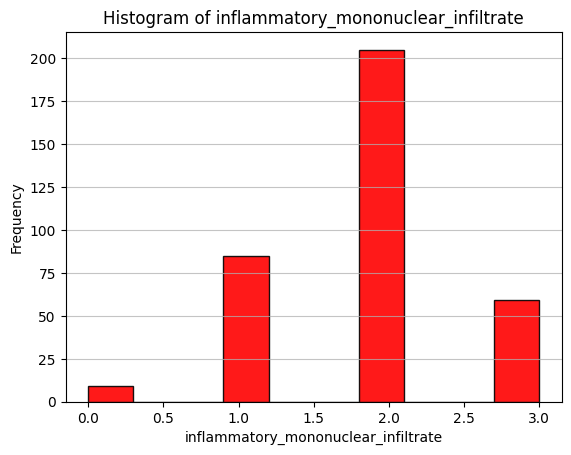

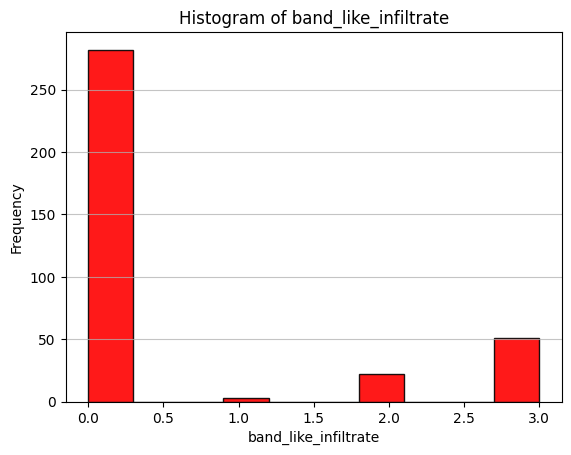

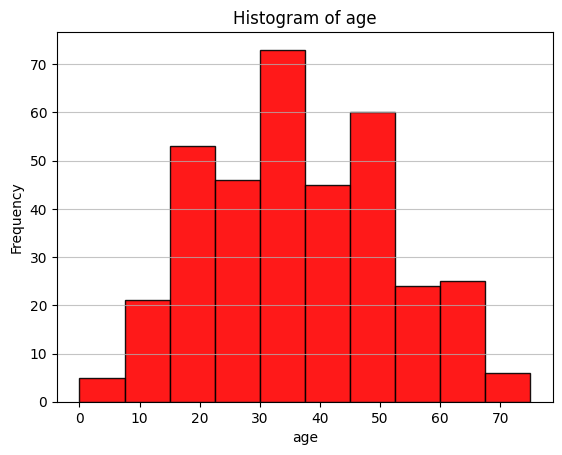

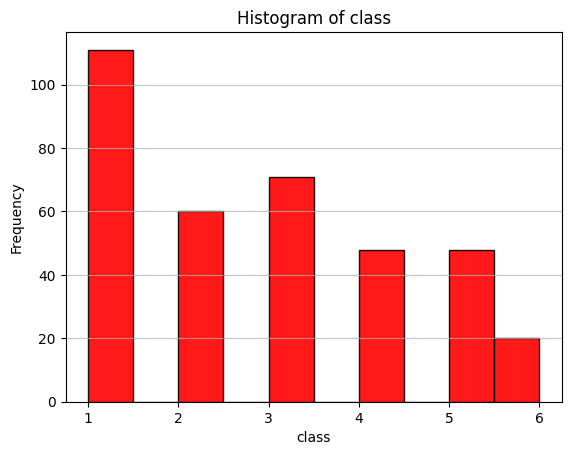

In [14]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=10, alpha=0.9, color='red', edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
plt.show()

<ipython-input-15-3a4c57a72e33>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 4))


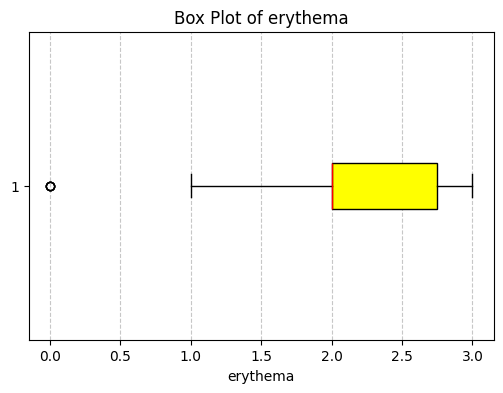

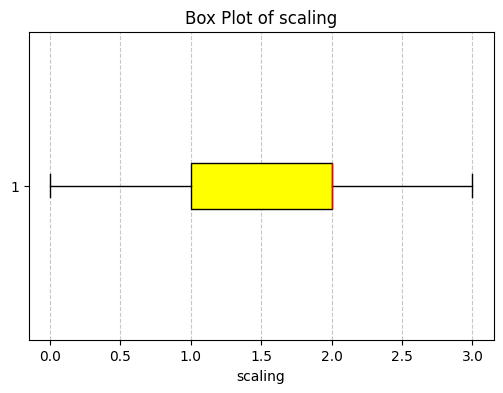

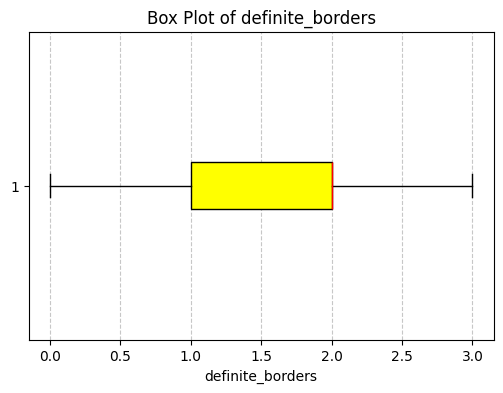

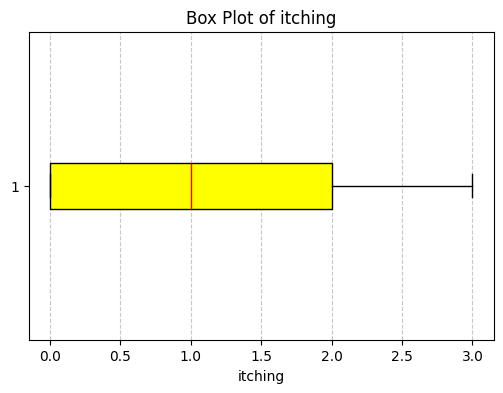

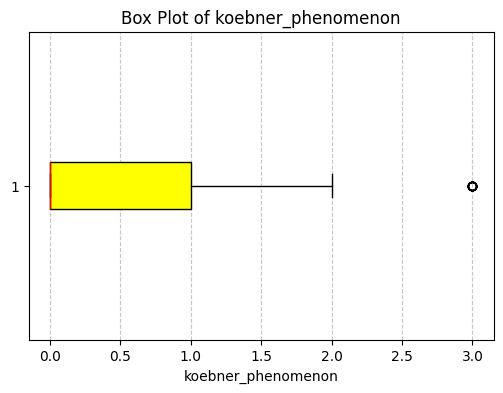

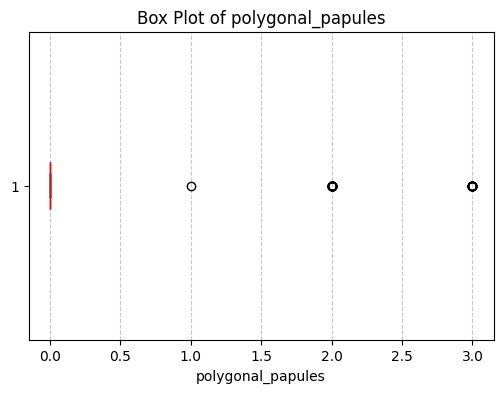

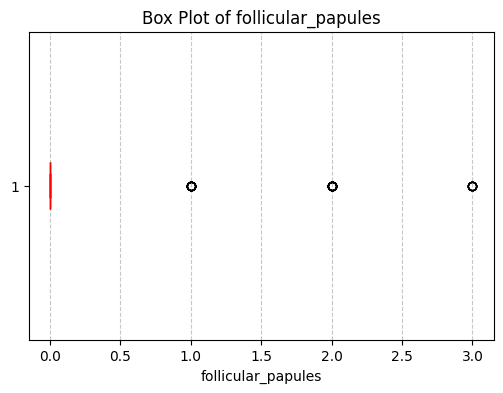

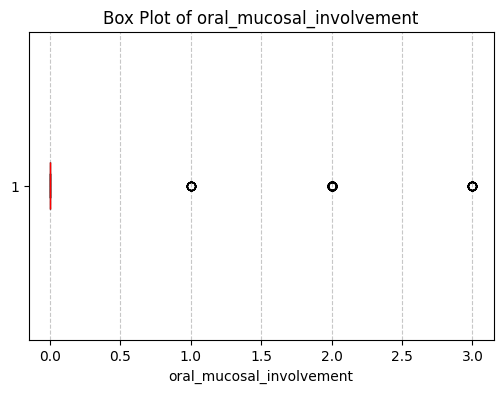

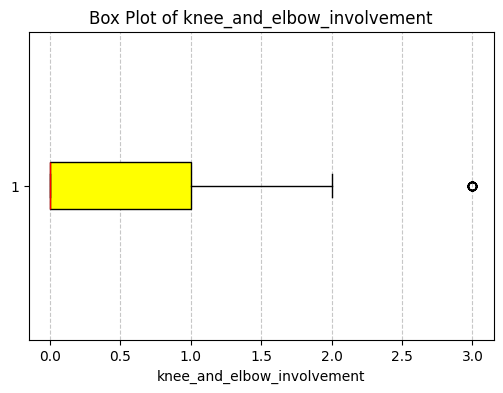

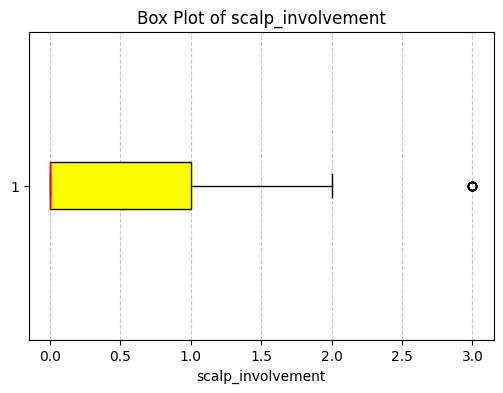

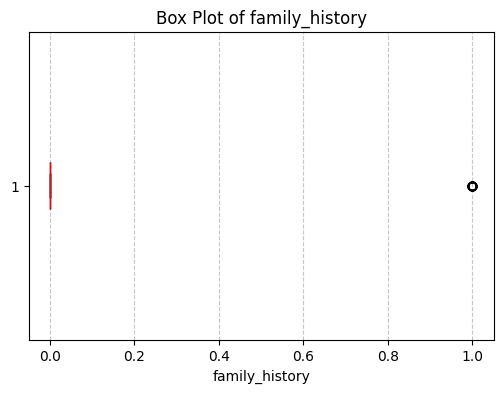

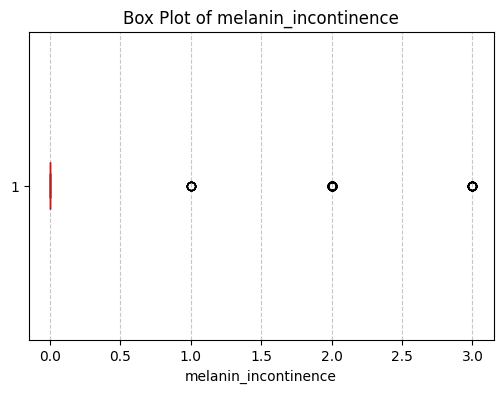

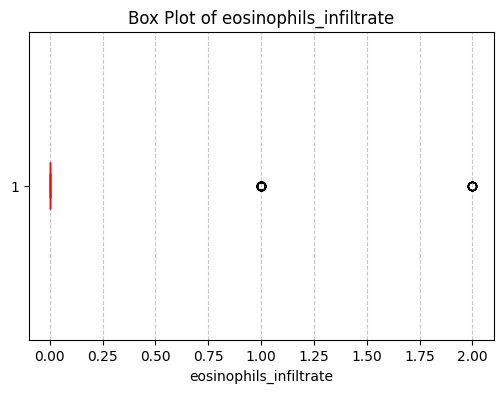

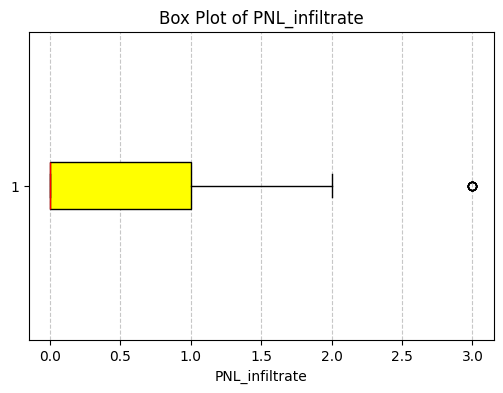

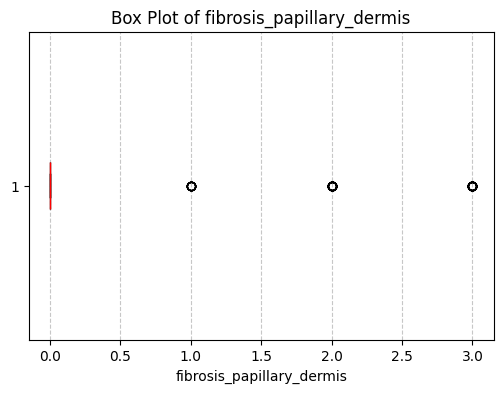

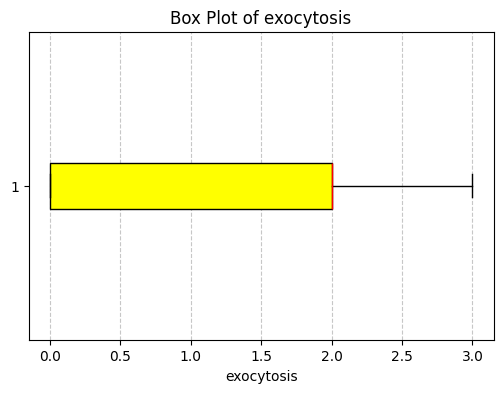

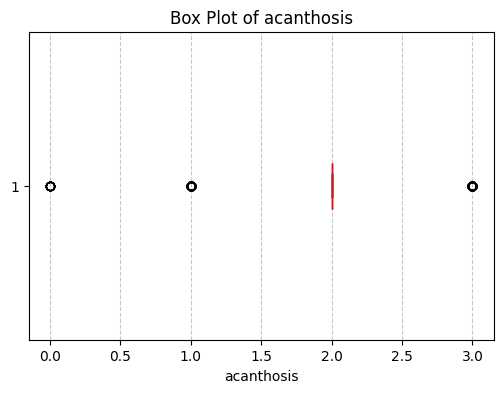

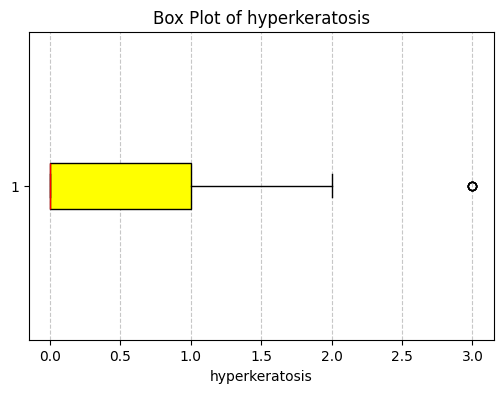

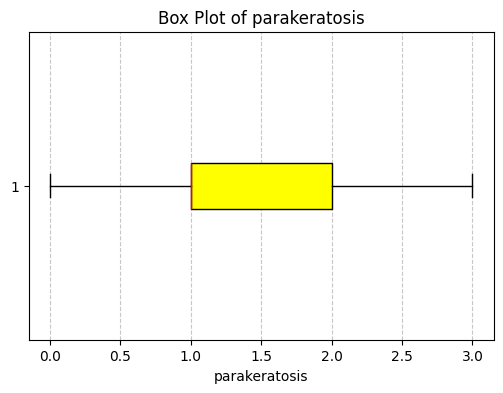

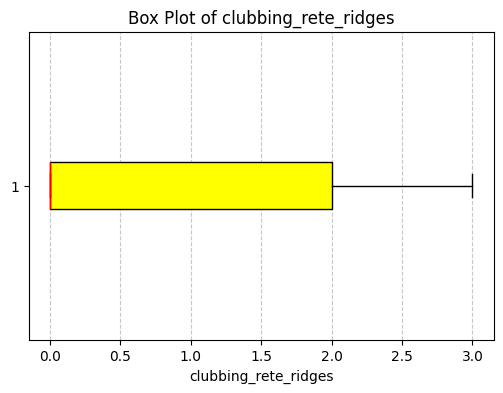

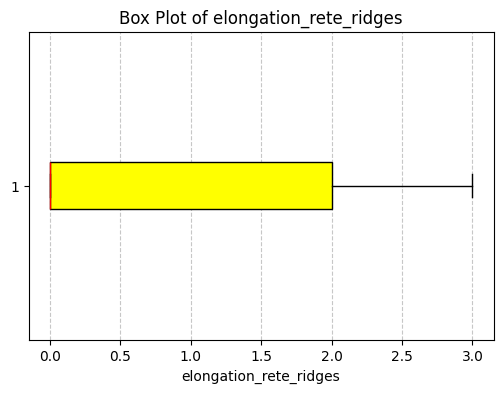

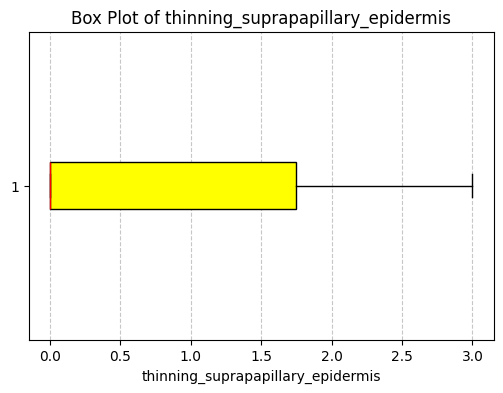

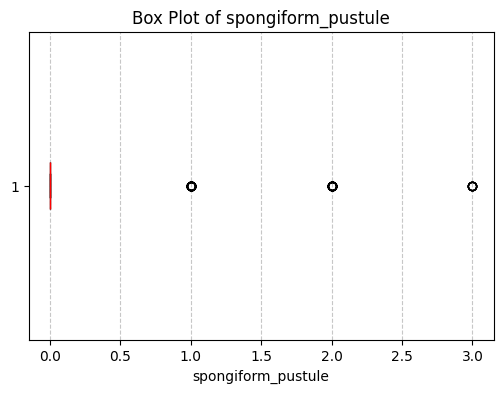

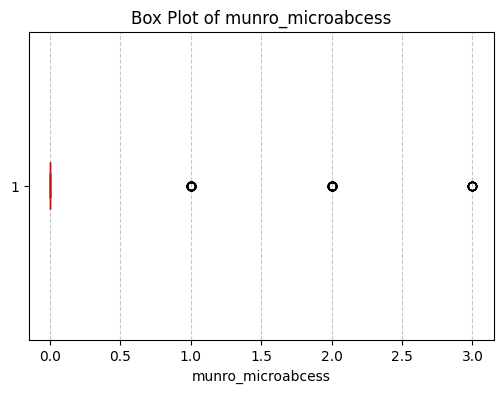

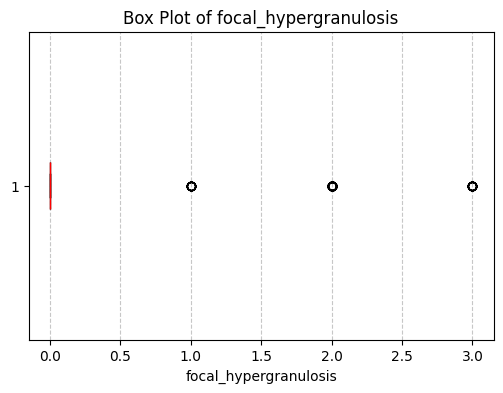

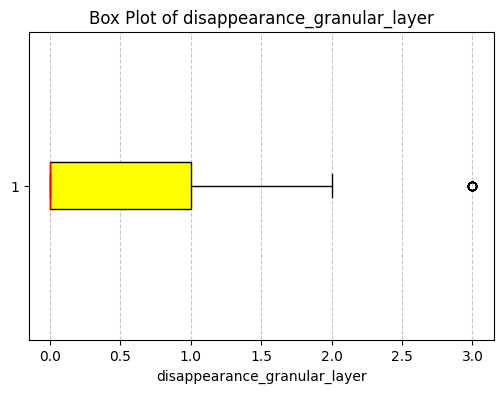

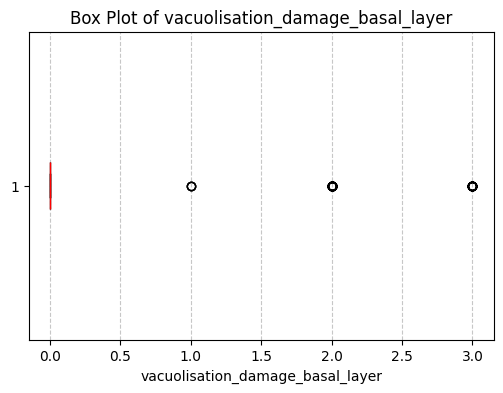

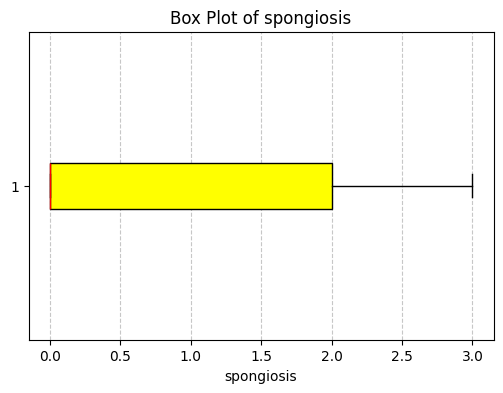

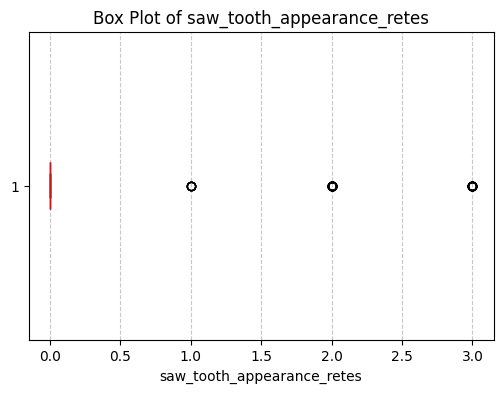

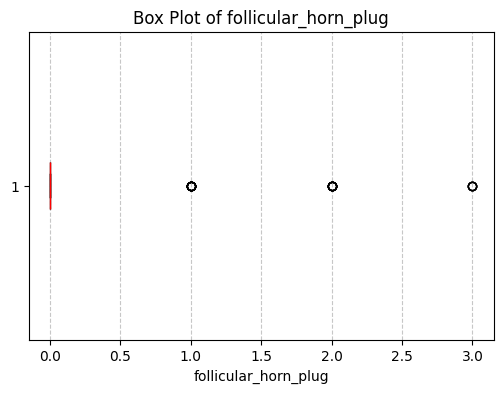

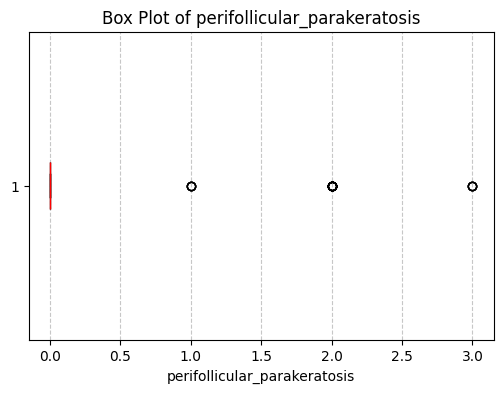

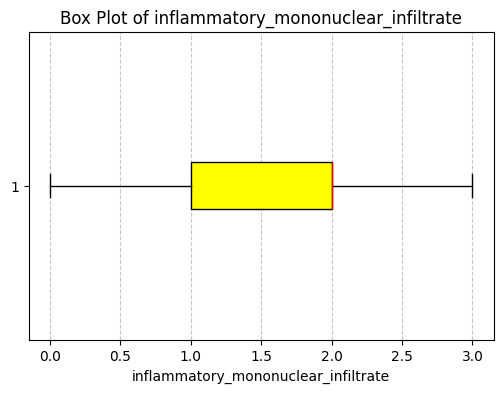

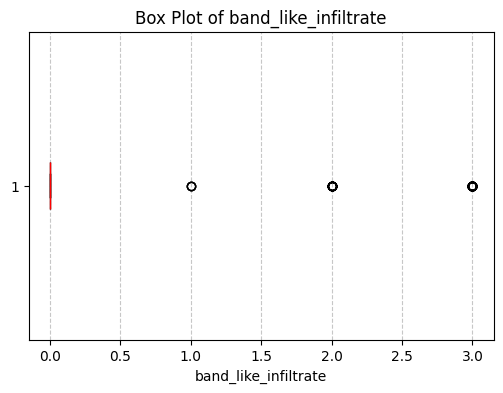

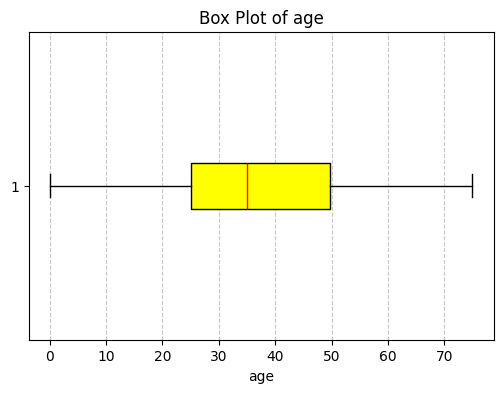

In [15]:
for column in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column], vert=False, patch_artist=True,
                boxprops=dict(facecolor='yellow', color='black'),
                medianprops=dict(color='red'))
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()